In [91]:
import os
from re import sub
from collections import defaultdict
from matplotlib import pyplot as plt

ISO_BOOKS_DIR = 'Brazilian_Portugese_Corpus/'
ISO_BOOKS = list(os.walk(ISO_BOOKS_DIR))[0][2]
UTF8_BOOKS_DIR = 'corpus/'

In [189]:
def get_utf8_books():
    if not os.path.isdir(UTF8_BOOKS_DIR):
        os.mkdir(UTF8_BOOKS_DIR)

    for book in ISO_BOOKS:
        book = book.replace(' ', '\ ')
        os.system(f'iconv -f ISO-8859-1 -t UTF-8 {ISO_BOOKS_DIR}/{book} -o {UTF8_BOOKS_DIR}/{book}')

    return list(os.walk(UTF8_BOOKS_DIR))[0][2]

def get_words(book):
    with open(UTF8_BOOKS_DIR + book, 'r') as file:
        text = file.readlines()

    text = ''.join(text)
    text = text.replace('\n',' ')
    text = sub('[ -;!?,:`~_@=<>|*#&%$\\xad\\x0c\\x91\\x92\\x93\\x94\\x95\\x96\\x97\[\]]+', ' ', text)
    words = [word.lower() for word in text.split()]
    return words

def count_words(words, count):
    for word in words:
        count[word] += 1

    return count

def plot_from_count(count):
    values = list(count.values())
    values.sort(reverse=True)
    fig = plt.figure() 
    ax = fig.add_subplot(1,1,1)
    ax.set_yscale('log')
    ax.set_xscale('log')
    ax.plot(values)

In [190]:
books = get_utf8_books()

print(books == ISO_BOOKS)

count = defaultdict(lambda: 0)

for book in books:
    count = count_words(get_words(book), count)

True


In [191]:
prefix = dict()
sufix = dict()

for k in range(6):
    prefix[k] = [ x[:k] for x in count if len(x) >= k ]
    sufix[k] = [ x[-k:] for x in count if len(x) >= k ]

In [192]:
set(prefix[1])

{'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '¡',
 '§',
 'ª',
 '«',
 '°',
 '´',
 '·',
 'º',
 '»',
 '½',
 '¾',
 'à',
 'á',
 'â',
 'ã',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ë',
 'ì',
 'í',
 'ò',
 'ó',
 'ô',
 'õ',
 'ú'}

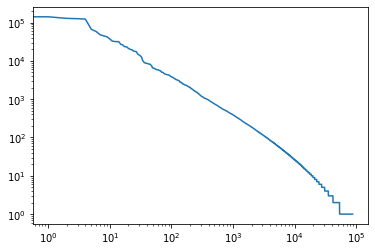

In [156]:
plot_from_count(count)